In [1]:
!pip install mplfinance

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [3]:
df = get_stock_data(4751).tail(100)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-04,1420.0,1428.0,1363.0,1375.0,5225500
2022-03-07,1355.0,1378.0,1325.0,1359.0,4025600
2022-03-08,1333.0,1417.0,1333.0,1395.0,6423600
2022-03-09,1400.0,1417.0,1389.0,1402.0,2951100
2022-03-10,1454.0,1462.0,1435.0,1440.0,3666000


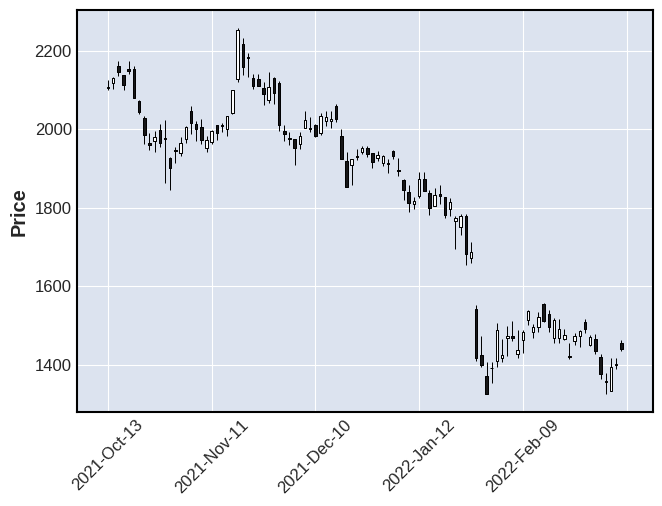

In [4]:
import mplfinance as mpf

df = get_stock_data(4751).tail(100)
mpf.plot(df, type='candle')

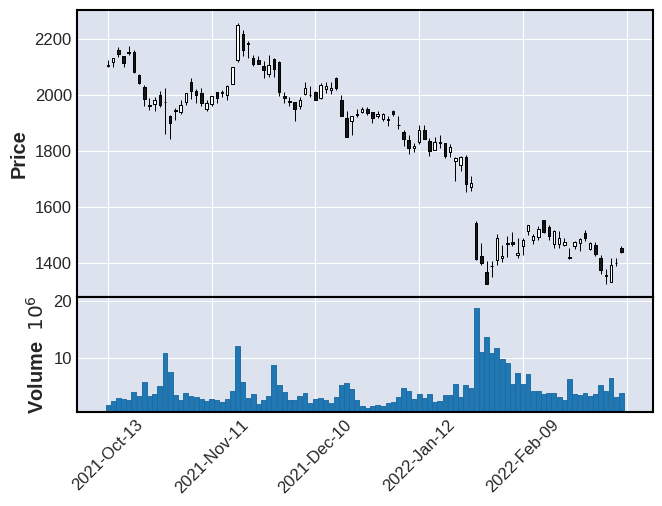

In [5]:
mpf.plot(df, type='candle', volume=True)

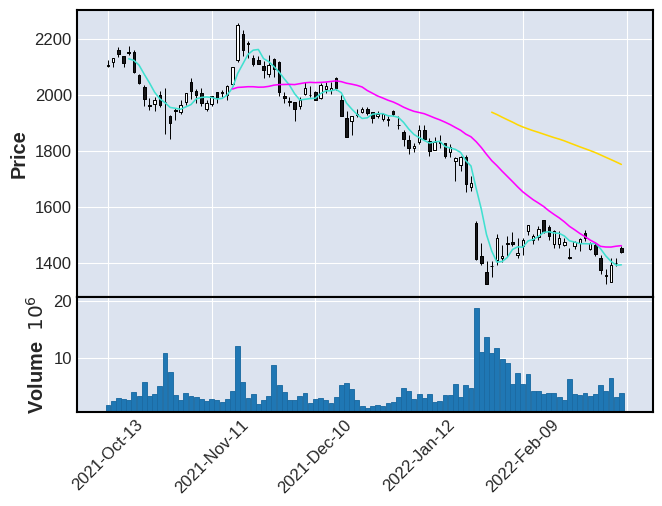

In [6]:
mpf.plot(df, type='candle', mav=(5, 25, 75), volume=True)

In [7]:
!pip install pyti

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [8]:
from pyti.bollinger_bands import upper_bollinger_band as bb_up
from pyti.bollinger_bands import middle_bollinger_band as bb_mid
from pyti.bollinger_bands import lower_bollinger_band as bb_low

data = df['Close'].tolist()  # 終値をリスト型に変換
period = 25
bb_up = bb_up(data, period)    # バンド上限
bb_mid = bb_mid(data, period)  # ミッドバンド
bb_low = bb_low(data, period)  # バンド下限
df['bb_up']  = bb_up
df['bb_mid'] = bb_mid
df['bb_low'] = bb_low

<AxesSubplot:xlabel='Date'>

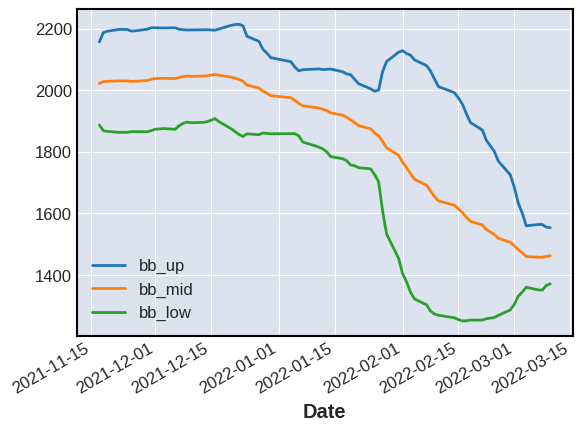

In [9]:
df[['bb_up', 'bb_mid', 'bb_low']].plot()

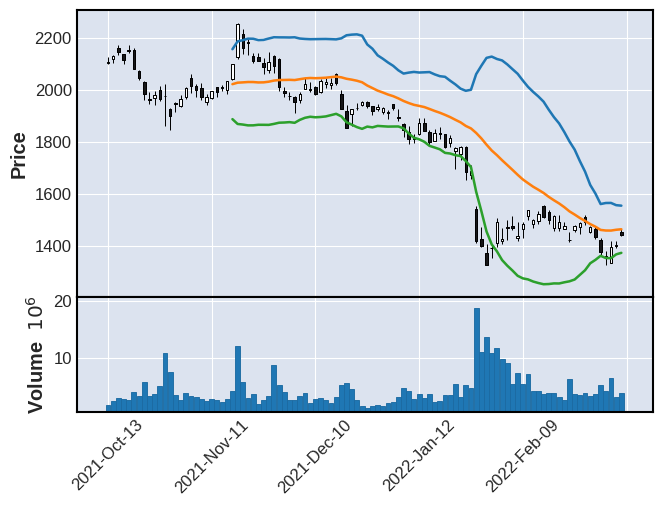

In [10]:
apd = mpf.make_addplot(df[['bb_up', 'bb_mid', 'bb_low']])
mpf.plot(df, type='candle', addplot=apd, volume=True)